In [86]:
import numpy as np
import importlib
import dataset
import config, plotting, sample, SampleCharacter, XLim, QRselection
import QrModels, Point
import copy

importlib.reload(config)
importlib.reload(dataset)
importlib.reload(plotting)
importlib.reload(sample)
importlib.reload(SampleCharacter)
importlib.reload(XLim)
importlib.reload(QRselection)
importlib.reload(QrModels)
importlib.reload(Point)

<module 'Point' from 'D:\\netSVG\\Point.py'>

In [87]:
import os
dataset_config = config.DatasetConfig(scenario="functional", n_instance=1000)

assert(dataset_config.scenario == "functional" 
      )
fig_dir = f"../figures/{dataset_config.scenario}"

try:
    os.mkdir(fig_dir)
    print(f"Directory {fig_dir} created ") 
except FileExistsError:
    print(f"Directory {fig_dir} already exists replacing files in this notebook")


Directory ../figures/functional already exists replacing files in this notebook


In [88]:
X_test,Y_test = dataset.get_functional_test_data()

In [89]:
X_train,Y_train = dataset.get_functional_train_data()

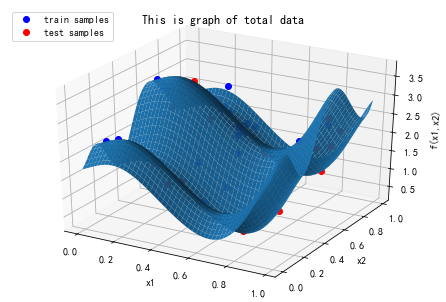

In [90]:
exp_config = config.Config(
    model=config.ModelConfig(activation="elu", lr_gen=0.0001, dec_gen=0, lr_disc=0.001, optim_gen="Adam", 
                             optim_disc="Adam", z_input_size=1),
    training=config.TrainingConfig(n_epochs=2000, batch_size=100, n_samples=100),
    dataset=dataset_config,
    run=config.RunConfig(save_fig=1)
)

plotting.plot_front(X_train, Y_train, X_test, Y_test, exp_config, fig_dir)

In [91]:
coef = sample.get_sta_reg_cov(X_train,Y_train)

Unstandardized regression coefficient: 
[-1.08468  0.09633]
normal coefficient: 
2.44233
Standardized regression coefficient: 
[-0.36156  0.0381 ]
normal coefficient: 
-0.0


In [92]:
imp = sample.get_importance(coef,Y_train)

y std:
0.71508
The importance for every dimension:
[0.50562 0.05328]


In [93]:
length = sample.get_sample_length(X_train,imp)

Euclidean distance in x domain：
[[0.    0.017 0.337 0.403 0.148 0.177 0.384 0.013 0.151 0.04  0.285 0.51
  0.227 0.341 0.079 0.219 0.038 0.313 0.613 0.111 0.055 0.012 0.195 0.173
  0.277 0.192 0.246 0.225 0.396 0.118]
 [0.017 0.    0.361 0.574 0.082 0.271 0.527 0.058 0.173 0.055 0.409 0.649
  0.328 0.501 0.165 0.314 0.106 0.471 0.725 0.109 0.131 0.04  0.115 0.271
  0.37  0.311 0.369 0.252 0.548 0.143]
 [0.337 0.361 0.    0.98  0.754 0.842 1.14  0.321 0.936 0.145 0.993 1.445
  0.95  0.412 0.502 0.956 0.378 0.794 1.732 0.076 0.448 0.465 0.832 0.81
  1.106 0.273 0.889 1.108 1.125 0.849]
 [0.403 0.574 0.98  0.    0.824 0.09  0.033 0.295 0.347 0.545 0.043 0.106
  0.083 0.194 0.126 0.1   0.206 0.01  0.259 0.757 0.163 0.319 0.921 0.078
  0.13  0.231 0.036 0.36  0.022 0.324]
 [0.148 0.082 0.754 0.824 0.    0.384 0.674 0.239 0.144 0.271 0.547 0.723
  0.43  0.926 0.359 0.402 0.305 0.739 0.694 0.352 0.321 0.142 0.003 0.401
  0.42  0.675 0.529 0.193 0.714 0.137]
 [0.177 0.271 0.842 0.09  0.384 0. 

In [94]:
x_min = np.amin(X_train, axis=0)
x_max = np.amax(X_train, axis=0)
L = sample.get_x_len(x_min, x_max)

The value area of x in the sample is between 0.0148 and 0.9764in the dimension of No. 0
The value area of x in the sample is between 0.07 and 0.9869in the dimension of No. 1
The full length of every dimension:
[0.9616 0.9169]


In [95]:
n_sample,length = sample.divide_sample(length, L)

The number of diversions of the 0th dimension is: 962
962
The number of diversions of the 1th dimension is: 97
97
总的样方分割数为：
93314
The number of diversions of the 0th dimension is: 802
802
The number of diversions of the 1th dimension is: 81
81
总的样方分割数为：
64962
The number of diversions of the 0th dimension is: 668
668
The number of diversions of the 1th dimension is: 68
68
总的样方分割数为：
45424
The number of diversions of the 0th dimension is: 557
557
The number of diversions of the 1th dimension is: 56
56
总的样方分割数为：
31192
The number of diversions of the 0th dimension is: 464
464
The number of diversions of the 1th dimension is: 47
47
总的样方分割数为：
21808
The number of diversions of the 0th dimension is: 387
387
The number of diversions of the 1th dimension is: 39
39
总的样方分割数为：
15093
The number of diversions of the 0th dimension is: 323
323
The number of diversions of the 1th dimension is: 33
33
总的样方分割数为：
10659
The number of diversions of the 0th dimension is: 269
269
The number of diversions of the 

In [96]:
dim = len(X_train[0])
gen_x = sample.gen_x_center(dim,length,n_sample, x_min)

第0维度，最小的x为0.0148
第0维度的中心值有：
[0.03077, 0.06272, 0.09467, 0.12662, 0.15857, 0.19051, 0.22246, 0.25441, 0.28636, 0.31831, 0.35025, 0.3822, 0.41415, 0.4461, 0.47805, 0.50999, 0.54194, 0.57389, 0.60584, 0.63779, 0.66973, 0.70168, 0.73363, 0.76558, 0.79753, 0.82947, 0.86142, 0.89337, 0.92532, 0.95727, 0.98921]
第1维度，最小的x为0.07
第1维度的中心值有：
[0.22159, 0.52478, 0.82797, 1.13115]


In [97]:
gen_sample_point = sample.gen_product(gen_x)
#print("样方中心点：")
gen_sample_point = np.array(gen_sample_point)
#print(gen_sample_point)

In [98]:
xlimit = []
for index in range(len(n_sample)):
    l = []
    for i in range(n_sample[index]):
        x = x_min[index] + i * length[index]
        l.append(x)
    l.append(x_min[index] + n_sample[index] * length[index])
    xlimit.append(l)

In [99]:
sample_list = []
xlim_list = []

In [100]:
x_value = []
for index in range(dim):
    xl = []
    for i in range(len(X_train)):
        x = X_train[i][index]
        r = 0
        for xi in xl:
            if xi == x:
                r = 1
        if r == 0:
            xl.append(x)
    x_value.append(xl)
    
x_value_ori = copy.deepcopy(x_value)

In [101]:
XLim.con_s(gen_sample_point, sample_list, dim, xlimit)

In [102]:
'''QuickHull
计算原始样本点围成的最大闭包图形
筛选处于闭包图形中的样方，样方的各个维度最大最小值，有一个处于闭包图形中，即算样方处于其中
此时得到的sample_list是经过筛选的
'''

'QuickHull\n计算原始样本点围成的最大闭包图形\n筛选处于闭包图形中的样方，样方的各个维度最大最小值，有一个处于闭包图形中，即算样方处于其中\n此时得到的sample_list是经过筛选的\n'

In [103]:
XLim.con_sample(xlim_list, length, x_min, dim, n_sample)

In [104]:
XLim.sample_feature(xlim_list, sample_list, x_value)

In [105]:
gen_x_cross = sample.gen_product(x_value)

In [106]:
sample.cross_point_del(gen_x_cross, X_train)

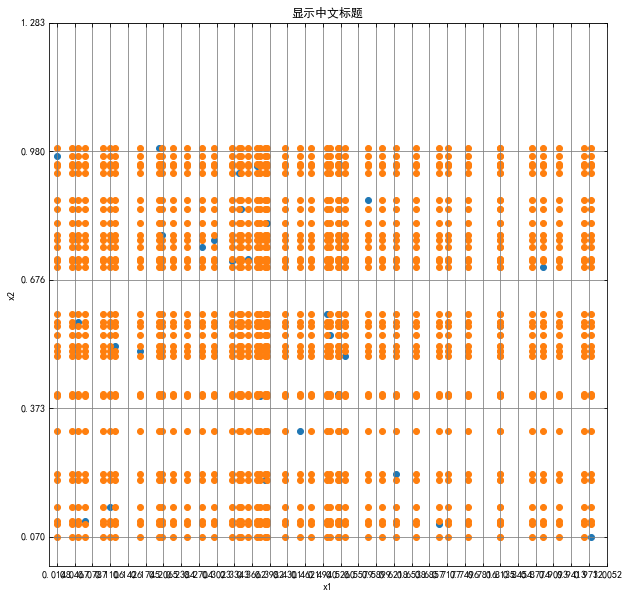

In [107]:
plot_xlim = []
for index in range(len(xlimit)):
    pl = []
    for i in range(len(xlimit[index])):
        if i != len(xlimit) - 1:
            pl.append(xlimit[index][i])
        else:
            plot_xlim.append(x_max[index])
    plot_xlim.append(pl)
        

In [ ]:
gen_x_cross = np.array(gen_x_cross)
plotting.plot_genx(X_train, gen_x_cross, length, n_sample, exp_config, fig_dir, plot_xlim, "gen_cross_x.png")

In [108]:
XLim.xl_attri(xlim_list, X_train, gen_x_cross)
XLim.sample_attri(sample_list, X_train, gen_x_cross, Y_train)
XLim.add_xvalue(xlim_list)

In [109]:
import GPy

noise = 0.01
length_ = 0.1

run_hyperopt_search = True

kernel = GPy.kern.RBF(input_dim=2, variance=noise, lengthscale=length_)
gpr = GPy.models.GPRegression(X_train, Y_train.reshape(-1,1), kernel)
if run_hyperopt_search:
    gpr.optimize(messages=True) 

In [110]:
gen_y_cross, cov_train_cross = gpr.predict(np.array(gen_x_cross))

In [111]:
XLim.add_y(sample_list, gpr)
print("over")

over


In [112]:
point_list = []
Point.con_point(gen_x_cross, gen_y_cross, point_list)

In [113]:
for sample in sample_list:
    for index in range(len(sample.gen_xlist)):
        for point in point_list:
            r = -1
            for i in range(dim):
                if point.x[i] != sample.gen_xlist[index][i]:
                    r = 0
                    break
            if r == -1:
                sample.points.append(point)

In [114]:
import statsmodels.api as sm
qrX = X_train
qrX = sm.add_constant(qrX[0:])
qr = sm.QuantReg(Y_train.reshape(-1,1),qrX)
res = qr.fit(q=.2)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2960
Model:                       QuantReg   Bandwidth:                       1.146
Method:                 Least Squares   Sparsity:                        2.326
Date:                Fri, 04 Sep 2020   No. Observations:                   30
Time:                        15:03:44   Df Residuals:                       27
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5650      0.695      3.692      0.001       1.140       3.990
x1            -2.8775      0.796     -3.617      0.001      -4.510      -1.245
x2             0.0942      0.791      0.119      0.906      -1.528       1.717


In [115]:
quantiles = np.arange(.05, .96, .1)
quantiles = np.around(quantiles, decimals=3)
def fit_model(q):
    res = qr.fit(q=q)
    return q, np.around(res.params,decimals=  4)

models = []

for x in quantiles:
    q, param = fit_model(x)
    model = QrModels.QrModels(q, param[0], param[1:])
    models.append(model)

for model in models:
    print(str(model.q)+'\t'+str(model.a)+'\t'+str(model.param))

ols = sm.OLS(Y_train.reshape(-1,1),qrX).fit()
           
for ol in ols.params:
    print(str(ol))

 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:235: RuntimeWarning:invalid value encountered in less_equal
 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:Maximum number of iterations (1000) reached.


0.05	1.5307	[-2.1743  0.736 ]
0.15	2.5677	[-3.2895  0.3183]
0.25	2.547	[-2.864   0.2543]
0.35	2.525	[-2.1032 -0.0023]
0.45	2.5091	[-2.1013  0.1458]
0.55	2.4922	[-0.7705  0.2478]
0.65	2.4692	[-0.5318  0.2228]
0.75	2.7868	[-0.4381 -0.1179]
0.85	3.899	[-1.086  -1.1141]
0.95	3.4968	[-0.731 -0.319]
2.442331164960009
-1.0846771586848056
0.09632890094793461


In [116]:
y_quantile = [0.691, 1.084, 1.592, 1.803, 2.194, 2.365, 2.440, 2.574, 2.670, 3.239]

In [117]:
vir_xpoint = []
vir_ypoint = []

for xv in x_value:
    xv.sort()
for xv in x_value_ori:
    xv.sort()

In [118]:
import QRselection
import importlib
importlib.reload(QRselection)


QRselection.qr_selection(xlim_list, models, vir_xpoint, vir_ypoint, y_quantile, ols, x_value_ori,
                 n_sample, X_train, Y_train, sample_list, point_list, x_value)
print("over")

over


In [119]:
i = 0
for point in point_list:
    if point.checked == 1:
        i += 1
print("over")

over


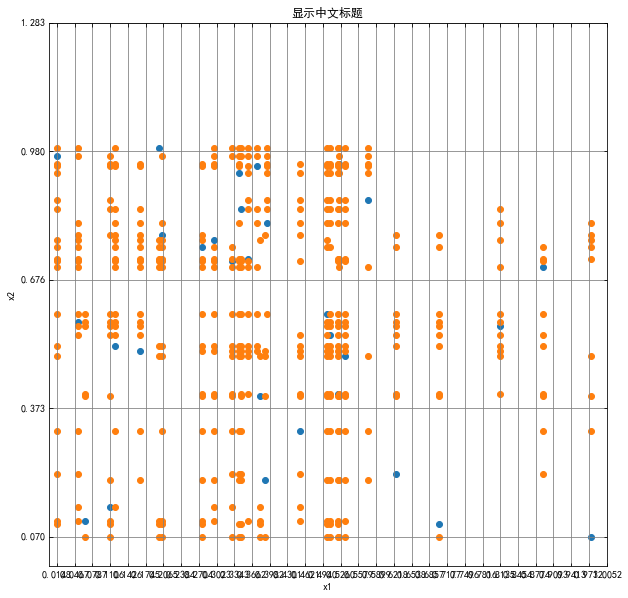

In [120]:
import plotting
import importlib
importlib.reload(plotting)

plotting.plot_genx(X_train, np.array(vir_xpoint), length, n_sample, exp_config, fig_dir, plot_xlim, "vir_point.png")


In [121]:
del_point = []
vir_point = []

for point in point_list:
    point.true = dataset.function(point.x[0], point.x[1])
    if point.y not in vir_ypoint:
        del_point.append(point)
    else:
        vir_point.append(point)

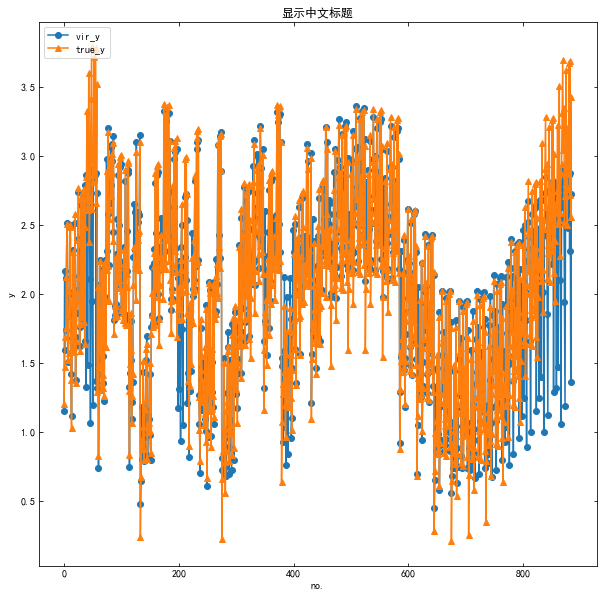

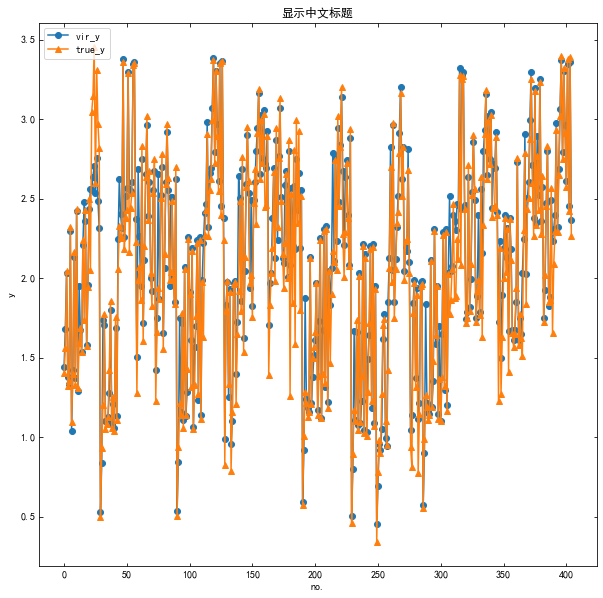

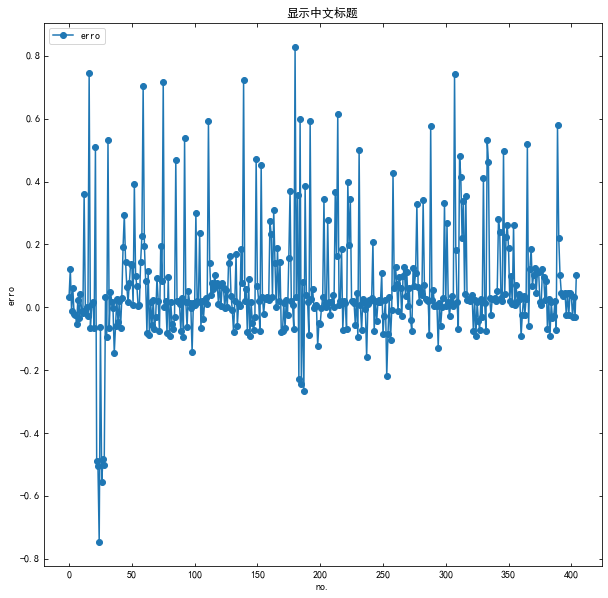

In [122]:
plotting.plot_qr(del_point, exp_config, fig_dir, "qr")
plotting.plot_qr(vir_point, exp_config, fig_dir, "left")
plotting.plot_erro(vir_point, exp_config, fig_dir, "erro")

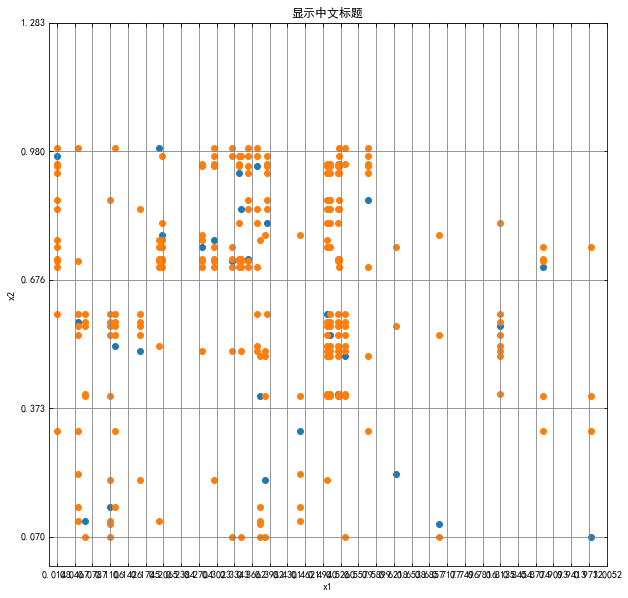

In [123]:
exist_list = []
for sample in sample_list:
    points = []
    for index in range(len(sample.points)):
        if sample.points[index] in vir_point:
            points.append(sample.points[index])
    if len(points) > 0:
        if sample.ori_num == 0:
            i = np.random.randint(0, len(points))
            exist_list.append(points[i])
        else:
            #i = np.random.randint(0, len(points), size = sample.ori_num + 1)
            i = len(points)
            for j in range(i):
                exist_list.append(points[j])

e_list = []
for point in exist_list:
    e_list.append(point.x)
plotting.plot_genx(X_train, np.array(e_list), length, n_sample, exp_config, fig_dir, plot_xlim, "selected_point2.png")
      

In [124]:
def mae1(point_list):
    p = len(point_list)
    a = 0
    for point in point_list:
        a += abs(point.y - point.true)
    return a / p

def mse1(point_list):
    p = len(point_list)
    a = 0
    for point in point_list:
        a += pow(point.y - point.true, 2)
    return a / p

mae = mae1(vir_point)
mse = mse1(vir_point)

print(" all vir point")
print(mae)
print(mse)

 all vir point
[0.11501214]
[0.03840502]


In [125]:
mae_s = mae1(exist_list)
mse_s = mse1(exist_list)

print(" selected vir point")
print(mae_s)
print(mse_s)



 selected vir point
[0.08337262]
[0.02796852]
